In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
from movenet_helper import * 

In [3]:
input_size = 192
model = hub.load(".\model\movenet_singlepose_lightning_4")
movenet = model.signatures['serving_default']

# Image Example 

In [ ]:
image_path = './input/woman.jpg'
image = tf.io.read_file(image_path)
image = tf.compat.v1.image.decode_jpeg(image)
#print(image.shape)
input_image = tf.expand_dims(image, axis=0)
#print(image.shape) # added 1 dim
input_image = tf.cast(tf.image.resize_with_pad(input_image, input_size, input_size), dtype=tf.int32)


In [ ]:
keypoints_with_scores = movenet(input_image)['output_0']

In [ ]:
keypoints_with_scores

In [ ]:
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(display_image, 1280, 1280), dtype=tf.int32)
output_overlay = draw_prediction_on_image(
    np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(output_overlay)
_ = plt.axis('off')

# Video Example 

In [2]:
import cv2 
from typing import Optional

In [3]:
vid = cv2.VideoCapture("./input/dance.mp4")


In [7]:
# Write a generator out of a video

def get_frame_at_milsec(milsec:int) -> Optional[np.array]:
    vid.set(cv2.CAP_PROP_POS_MSEC, milsec)
    has_frames, image = vid.read() 
    if has_frames:
        print(image.shape)
        plt.imshow(image)
        return image
    return None  

(2160, 3840, 3)


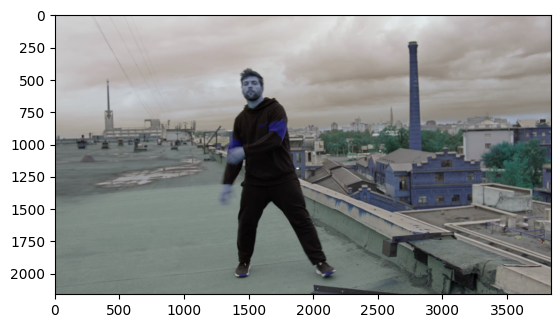

In [8]:
image = get_frame_at_milsec(10)

In [21]:
image 